# PS.2 (inner product is backwards stable)
Consider 
\begin{equation*}
		f,\tilde{f}:\mathbb{R}^2\times \mathbb{R}^2\rightarrow\mathbb{R}, \qquad f(x,y)=\langle x,y\rangle,\qquad \tilde{f}(x,y)= \bigoplus_{k=1}^2 (x_k\odot 		y_k).
	\end{equation*}
    
a) Verify that $\tilde{f}$ is partially backwards stable when considered as the map $\tilde{f}:\mathbb{R}^4\rightarrow \mathbb{R}$, and recall that $x_k\odot 		y_k$ means $\mathrm{fl}(x_k)\odot \mathrm{fl}(y_k)$.

b) What is the partial conditioning of $f:\mathbb{R}_+^4\rightarrow \mathbb{R}$, where $\mathbb{R}_+=(0,\infty)$.

## Solution

a) There are $\epsilon_i=\mathcal{O}(\mathrm{eps})$ such that 

\begin{align*}
\tilde{f}(x,y) &= \left(x_1(1+\epsilon_1) \odot y_1(1+\epsilon_2)\right)\oplus \left(x_2(1+\epsilon_3) \odot y_2(1+\epsilon_4)\right) \\
& = x_1 y_1\underbrace{(1+\epsilon_1)  (1+\epsilon_2)(1+\epsilon_{5})}_{1+\epsilon_6} \oplus x_2y_2\underbrace{(1+\epsilon_3)  (1+\epsilon_4)(1+\epsilon_5)}_{1+\epsilon_7}\\
& =\left( x_1 y_1(1+\epsilon_6) + x_2y_2(1+\epsilon_7) \right)(1+\epsilon_8)\\
& =  x_1 y_1(1+\epsilon_9)+x_2y_2(1+\epsilon_{10}).
\end{align*}

The choices $\tilde{x}_1 = x_1$, $\tilde{y}_1=y_1(1+\epsilon_9)$, and $\tilde{x}_2 = x_2$, $\tilde{y}_2=y_2(1+\epsilon_{10})$ lead to $\tilde{f}(x,y)=f(\tilde{x},\tilde{y})$ with 

\begin{equation*}
\frac{|\tilde{x}_i-x_i|}{|x_i|}=\mathcal{O}(\mathrm{eps}),\quad \frac{|\tilde{y}_i-y_i|}{|y_i|}=\mathcal{O}(\mathrm{eps}).
\end{equation*}

b) For $f(x,y)=f(x_1,x_2,y_1,y_2)=x_1y_1+x_2y_2$, we obtain
\begin{align*}
\hat{\kappa}^1_f(x,y) &= y_1\frac{x_1}{f(x,y)} \\
\hat{\kappa}^2_f(x,y) &= y_2\frac{x_2}{f(x,y)} \\
\hat{\kappa}^3_f(x,y) &= x_1\frac{y_1}{f(x,y)} \\
\hat{\kappa}^4_f(x,y) &= x_2\frac{y_2}{f(x,y)},
\end{align*}
so that $\hat{\kappa}_f(x,y)=2$.

# PS.2 (p-q-formula)

Consider the p-q-formula:

\begin{equation}
f(x) = x^2-2px+q,\qquad\qquad
x_{1/2}  = p\pm\sqrt{p^2-q}
\end{equation}

a) Explain why myPQnaive does not pass the tests below.

In [1]:
function myPQnaive(p,q)          
    s = sqrt(p^2-q)
    x1 = p+s                
    x2 = p-s                
    return x1,x2
end

myPQnaive (generic function with 1 method)

In [2]:
using Test
f(x,p,q) = x^2-2p*x+q
p = 10^7.0
q = 1.0
@testset "myPQnaive" begin     
    x1,x2 = myPQnaive(p,q)
    @test abs(f(x1,p,q)) < 1e-8
    @test abs(f(x2,p,q)) < 1e-8 
end

myPQnaive: Test Failed at In[2]:8
  Expression: abs(f(x2, p, q)) < 1.0e-8
   Evaluated: 0.005828380584714354 < 1.0e-8
Stacktrace:
 [1] macro expansion
   @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Test/src/Test.jl:464 [inlined]
 [2] macro expansion
   @ In[2]:8 [inlined]
 [3] macro expansion
   @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Test/src/Test.jl:1357 [inlined]
 [4] top-level scope
   @ In[2]:6
Test Summary: | Pass  Fail  Total  Time
myPQnaive     |    1     1      2  2.4s


LoadError: [91mSome tests did not pass: 1 passed, 1 failed, 0 errored, 0 broken.[39m

Vieta's formula yields

\begin{equation*}
x^2-2px+q=(x-x_1)(x-x_2)\quad \Rightarrow \quad x_1 \cdot x_2 = q,\quad x_1+x_2 = 2p
\end{equation*}

b) Write a function myPQ according to Vieta's formula. Check the testset to illustrate improvement upon myPQnaive. 

In [3]:
function myPQ(p,q) 
    s = sqrt(p^2-q)
    if p>0
        x1 = p+s
        x2 = q/x1
    else 
        x2 = p-s
        x1 = q/x2
    end
    return x1,x2
end
    
@testset "myPQ" begin     
    x1,x2 = myPQ(p,q)
    @test abs(f(x1,p,q)) < 1e-8
    @test abs(f(x2,p,q)) < 1e-8 
end

Test Summary: | Pass  Total  Time
myPQ          |    2      2  0.0s


Test.DefaultTestSet("myPQ", Any[], 2, false, false, true, 1.666086931345996e9, 1.666086931351975e9)

In [4]:
x1,x2 = myPQnaive(p,q)
y1,y2 = myPQ(p,q)
@show x1 y1;
@show x2 y2;

@show f(x1,p,q) f(y1,p,q);
@show f(x2,p,q) f(y2,p,q); 

x1 = 1.9999999999999948e7
y1 = 1.9999999999999948e7
x2 = 5.029141902923584e-8
y2 = 5.000000000000013e-8
f(x1, p, q) = 0.0
f(y1, p, q) = 0.0
f(x2, p, q) = -0.005828380584714354
f(y2, p, q) = -2.220446049250313e-16


# PS.2 (two variance formulas)

If bad conditioned computations are not avoidable, then put them at the beginning, NOT at the end.

The sample variance of data $x_1,\ldots,x_n\in\mathbb{R}$ is
\begin{equation}
\mathrm{Var}(x_1,\ldots,x_n)=\frac{1}{n-1}\sum_{k=1}^n (x_k-\bar{x})^2,\qquad \bar{x} = \frac{1}{n}\sum_{k=1}^n x_k
\end{equation}

This formula coincides with 
\begin{align}
\mathrm{Var}(x_1,\ldots,x_n) &= \frac{1}{n-1} \sum_{k=1}^n\left(x_k^2-2x_k\bar{x}+\bar{x}^2\right)\\
&= \frac{1}{n-1} \left(\sum_{k=1}^n x_k^2 -2n\bar{x}^2+n\bar{x}^2\right)\\
&= \frac{1}{n-1} \left(\sum_{k=1}^n x_k^2 -n\bar{x}^2\right)\\
&=\frac{1}{n-1} \left(\sum_{k=1}^n x_k^2-\frac{1}{n}\left(\sum_{k=1}^n x_k\right)^2 \right)
\end{align}

For small variances, the first formula is more stable than the second.

**First formula:**

\begin{equation}
\mathrm{Var}(x_1,\ldots,x_n)=\frac{1}{n-1}\sum_{k=1}^n (x_k-\bar{x})^2,\qquad \bar{x} = \frac{1}{n}\sum_{k=1}^n x_k
\end{equation}

a) Implement the first formula for the sample variance.

In [5]:
function myVariance(x)  # first formula
    n = length(x)
    x̄ = sum(x)/n
    sum((x[k]-x̄)^2 for k in 1:n)/(n-1)
end

myVariance (generic function with 1 method)

**Second formula:**

\begin{equation}
\mathrm{Var}(x_1,\ldots,x_n)=\frac{1}{n-1} \left(\sum_{k=1}^n x_k^2-\frac{1}{n}\left(\sum_{k=1}^n x_k\right)^2 \right)
\end{equation}

b) Implement the second formula for the sample variance.

In [6]:
function myVariance_naive(x)  # second formula
    n = length(x)
    (sum(x.^2)-sum(x)^2/n)/(n-1)
end

myVariance_naive (generic function with 1 method)

The mean of the data

\begin{align}
x_1 & = 10,000,000.0\\
x_2 & = 10,000,000.1\\
x_3 & = 10,000,000.2
\end{align}

is $\bar{x}=x_2$ and the variance is

\begin{equation}
\mathrm{Var}(x_1,x_2,x_3) = 2(0.1)^2 /2 = 0.01.
\end{equation}

c) Decide which formula provides the more accurate result.

In [7]:
x = [10_000_000.0; 10_000_000.1; 10_000_000.2]
myVariance(x) , myVariance_naive(x)

(0.009999999925494194, -0.03125)

# PS.2 (cancelations)
Consider the following functions 
\begin{align*}
f_1(x)&=x^3−6 a x^2+12 a^2 x-8 a^3=(x−2a)^3,\quad a = \frac{1}{2}\cdot 10^7 -1=4 999 999\\
f_2(x) & =  \frac{1}{x-\sqrt{x^2-1}} \\
f_3(x) & = 1-\sqrt{1-x^2}\\
f_4(x) & = x^9-18x^8+144x^7-672x^6+2016x^5-4032x^4+5376x^3-4608x^2+2304x-512 = (x-2)^9\\
f_5(x) &= \frac{1}{1+2x}-\frac{1-x}{1+x}.
\end{align*}

a) Determine $\kappa_{f_1}(10^7)$. Which of the two versions in julia provides the more accurate value of $f_1(10^7)$?

b) Evaluate $f_2$ at $x_0=10^7$ in julia. Reformulate $f_2$ to avoid cancelations and plot both versions in the vicinity of $x_0$.

c) Determine $\lim_{x\rightarrow 0}\kappa_{f_3}(x)$. Reformulate $f_3$ to avoid cancelations when evaluating in julia at $x_0=10^{-7}$. Plot both versions in the vicinity of $x$.

d) Plot both versions of $f_4$ in julia in the interval $[1.925,2.075]$.

e) Determine $\lim_{x\rightarrow 0}\kappa_{f_5}(0)$. Plot $f_5$ in julia in the interval $[-5 \cdot 10^{-8},5\cdot  10^{-8}]$. Reformulate $f_5$ and obtain a more accurate plot. 

## Solution

a) We compute $\kappa_{f_1}(x) = 3(x-2a)^2\frac{|x|}{|x-2a|^3}$, so that 
\begin{equation*}
\kappa_{f_1}(10^7) = 12\frac{10^7}{8} = \frac{3}{2}10^7.
\end{equation*}

In [8]:
a = 4999999
f(x) = x^3−6*a*x^2+12*a^2*x-8*a^3
g(x) = (x−2a)^3    # is more accurate
x₀ = 10.0^7 
@show f(x₀) g(x₀) ; 

f(x₀) = 9.961241799803162e20
g(x₀) = 8.0


b) The binomial formula yields

\begin{equation*}
\frac{1}{x-\sqrt{x^2-1}} = \frac{x+\sqrt{x^2-1}}{(x+\sqrt{x^2-1})(x-\sqrt{x^2-1})}=x+\sqrt{x^2-1}
\end{equation*}

f(x) = 1.988410785185185e7
g(x) = 1.9999999999999948e7


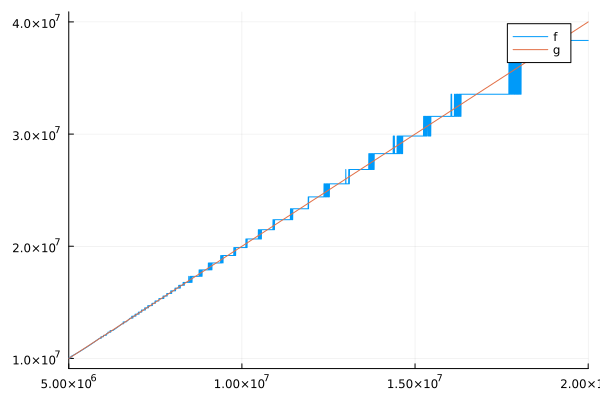

In [9]:
f(x) = 1/(x-sqrt(x^2-1))
g(x) = x+sqrt(x^2-1)

x = 10.0^7
@show f(x)
@show g(x)

using Plots
plot(f,xlimits=[10^7/2;2*10^7],label="f")
plot!(g,xlimits=[.5*10^7;2*10^7],label="g")

c) We compute 
\begin{align*}
\kappa_{f_3}(x) & = \frac{|x|}{\sqrt{1-x^2}}\cdot\frac{|x|}{1-\sqrt{1-x^2}}\\
& = 
\frac{|x|}{\sqrt{1-x^2}}\cdot\frac{|x|(1+\sqrt{1-x^2})}{1-(1-x^2)}\\
& = 
\frac{(1+\sqrt{1-x^2})}{\sqrt{1-x^2}},
\end{align*}
so that $\lim_{x\rightarrow 0}\kappa_{f_3}(x)=2$.

We also observe

\begin{equation*}
1-\sqrt{1-x^2}=\frac{x^2}{1+\sqrt{1-x^2}},\qquad 0\neq x\approx 0.
 \end{equation*}

f(x₀) = 4.9960036108132044e-15
g(x₀) = 5.000000000000011e-15


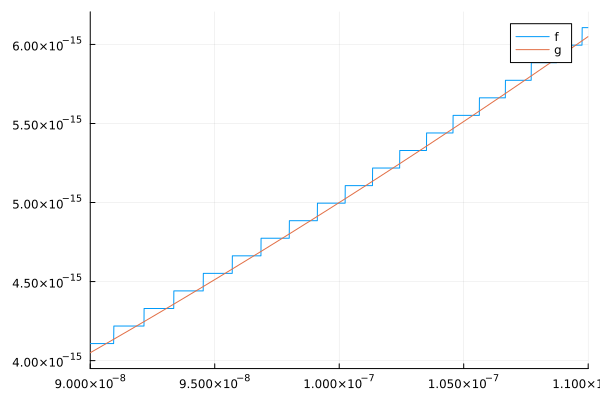

In [10]:
f(x) = 1-sqrt(1-x^2)           # cancelations
g(x) = x^2/(1+sqrt(1-x^2))     # more stable

x₀ = 1e-7 

@show f(x₀)
@show g(x₀)

plot(f,xlimits=[0.9e-7;1.1e-7],label="f")
plot!(g,label="g")

d) 

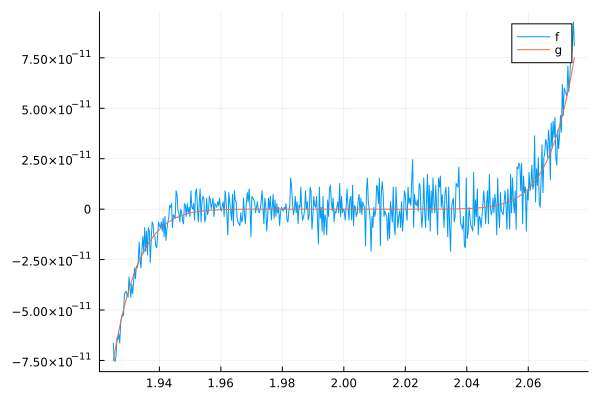

In [11]:
f(x) = x^9-18x^8+144x^7-672x^6+2016x^5-4032x^4+5376x^3-4608x^2+2304x-512
g(x) = (x-2)^9

using Plots

X = range(1.925,2.075,500)

plot(X,f.(X),label = "f")
plot!(X,g.(X),label = "g")

e) We first observe

\begin{equation*}
f_5(x)= \frac{1}{1+2x}-\frac{1-x}{1+x} = \frac{2x^2}{(1+x)(1+2x)}.
\end{equation*}

The conditioning is
\begin{align*}
\kappa_{f_5}(x)& = 
\left| \frac{4x(1+x)(1+2x)-2x^2 ((1+2x)+(1+x)2)}{(1+x)^2(1+2x)^2} \right| \frac{|x|}{|f_5(x)|} \\
& =\left|\frac{4x(1+x)(1+2x)-2x^2 ((1+2x)+(1+x)2)}{(1+x)^2(1+2x)^2} \right| \frac{|x|(1+x)(1+2x)}{2x^2} \\
& =\left|\frac{4(1+x)(1+2x)-2x ((1+2x)+(1+x)2)}{(1+x)(1+2x)} \right| \frac{1}{2},
\end{align*}
so that we obtain $\lim_{x\rightarrow 0}\kappa_{f_5}(x)=2$.



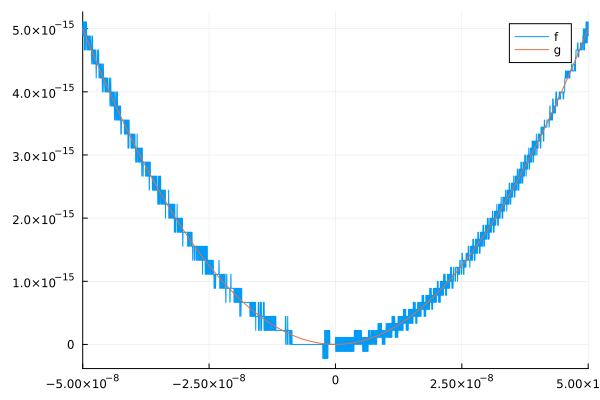

In [12]:
function f(x)
    a = 1/(1+2*x)
    b = (1-x)/(1+x)
    return a-b
end

function g(x)
    a = 2*x^2
    b = (1+x)*(1+2*x)
    return a/b
end

x = 1e-10
using Plots
plot(f,xlimits=[-5e-8,5e-8],label="f")
plot!(g,label="g")